## Load MNIST on Python 3.x

In [75]:
from keras.utils.np_utils import to_categorical 
from numpy import argmax
import tensorflow as tf
import numpy as np
import pickle
import gzip
import math

In [76]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()

In [77]:
trainingdata = np.asmatrix(training_data[0])
trainingtarget1 = np.asmatrix(training_data[1])
testdata = np.asarray(test_data[0])
testtarget = np.asarray(test_data[1])
valdata = np.asarray(validation_data[0])
valtarget = np.asarray(validation_data[1])

print(trainingdata.shape)
print(testdata.shape)
print(valdata.shape)

(50000, 784)
(10000, 784)
(10000, 784)


##  Load USPS on Python 3.x

In [78]:
from keras.utils.np_utils import to_categorical   
from PIL import Image
import os
import numpy as np
import math

In [79]:
USPSMat  = []
USPSTar  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

In [80]:
print(np.shape(USPSMat))
print(np.shape(USPSTar))

(19999, 784)
(19999,)


# 1 Multi-class Logistic Regression With Softmax

In [81]:
nb_classes = 10
r,c = (np.asmatrix(trainingdata)).shape
print((np.asmatrix(trainingdata)).shape)

trainingtarget = to_categorical(trainingtarget1, nb_classes)
trainingtarget = trainingtarget.reshape(50000,10)

def softmax(data,w):
    x = np.dot(data,w)
    e_x = np.exp(x-np.max(x))
    return e_x/e_x.sum(axis=1)

(50000, 784)


In [82]:
learningRate = 0.005
nb_classes   = 10

W_Now = np.ones((c,10))

#<-------------------------------------------------Test Data--------------------------------------------------------->#

for i in range(0,50000):
    
    t_data        = trainingdata[i].reshape(784,1)    
    y             = softmax(t_data.T,W_Now)
    tr = trainingtarget[i].reshape(1,10)
    Target_new    = np.subtract(y,tr)
    Delta_E       = np.dot(t_data,Target_new)
    Delta_W       = np.dot(learningRate,Delta_E)
    W_T_Next      = np.subtract(W_Now,Delta_W)
    W_Now         = W_T_Next
    

In [364]:
#<-------------------------------------------------Test Data--------------------------------------------------------->#

counter = 0
y_ts           = softmax(testdata,W_Now)
TR_TEST_OUT_M = np.argmax(y_ts, axis=1)
TR_OUT      = np.transpose(testtarget)

for i in range (0,10000):
    if(TR_TEST_OUT_M[i] == TR_OUT[i]):
        counter+=1
acc_ts = (counter/10000)*100

#<----------------------------------------------Vadlidation Data------------------------------------------------------>#

counter = 0
y           = softmax(valdata,W_Now)
VL_TEST_OUT_M = np.argmax(y, axis=1)
VL_OUT      = np.transpose(valtarget)

for i in range (0,len(valtarget)):
    if(VL_TEST_OUT_M[i] == VL_OUT[i]):
        counter+=1
acc_vl = (counter/len(valtarget))*100


In [363]:
print("Testing Accuracy -------->  "+ str(np.around(acc_ts,4)))
print("Validation Accuracy ----->  "+ str(np.around(acc_vl,4)))

Testing Accuracy -------->  90.84
Validation Accuracy ----->  91.33


In [365]:
from sklearn.metrics import confusion_matrix
y_true = testtarget
y_pred = TR_TEST_OUT_M
confusion_matrix(y_true, y_pred)

array([[ 955,    0,    1,    4,    0,    5,    9,    1,    5,    0],
       [   0, 1113,    0,    5,    0,    3,    4,    2,    8,    0],
       [   9,    9,  881,   31,   11,    3,   13,   24,   43,    8],
       [   2,    0,   11,  927,    0,   37,    1,   12,   12,    8],
       [   2,    4,    4,    1,  887,    1,   12,    4,   10,   57],
       [   8,    5,    1,   44,    6,  775,   10,    9,   26,    8],
       [  12,    3,    3,    3,    8,   29,  892,    3,    5,    0],
       [   2,   14,   19,    8,    5,    0,    0,  951,    3,   26],
       [   3,   10,    4,   46,    7,   55,   12,   16,  808,   13],
       [   8,    8,    2,   13,   20,   19,    0,   40,    4,  895]],
      dtype=int64)

In [367]:
print(classification_report(testtarget, TR_TEST_OUT_M)) 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.95      0.85      0.90      1032
           3       0.86      0.92      0.89      1010
           4       0.94      0.90      0.92       982
           5       0.84      0.87      0.85       892
           6       0.94      0.93      0.93       958
           7       0.90      0.93      0.91      1028
           8       0.87      0.83      0.85       974
           9       0.88      0.89      0.88      1009

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [305]:
mnist1 = np.asarray(VL_TEST_OUT_M) #-------------------------------> MNIST prediction 1

## Testing on USPS Dataset

In [369]:
counter = 0
y           = softmax(USPSMat,W_Now)
USPS_TEST_OUT_U = np.argmax(y, axis=1)
USPS_OUT      = np.transpose(USPSTar)

for i in range (0,len(USPSTar)):
    if(USPS_TEST_OUT_U[i] == USPS_OUT[i]):
        counter+=1
acc_usps = (counter/len(USPSTar))*100

In [370]:
print("Testing Accuracy on USPS -------->  "+ str(np.around(acc_usps,4)))

Testing Accuracy on USPS -------->  34.9467


In [371]:
from sklearn.metrics import confusion_matrix
y_true = USPSTar
y_pred1 = USPS_TEST_OUT_U
confusion_matrix(y_true, y_pred1)

array([[ 563,    4,  255,   84,  167,  238,   95,   88,  146,  360],
       [ 159,  356,  161,  341,  153,  108,   29,  464,  202,   27],
       [ 173,   21, 1101,  233,   37,  149,   87,   85,   81,   32],
       [  59,    2,  108, 1337,    3,  331,    3,   67,   56,   34],
       [  64,   81,   32,   75,  833,  169,   46,  210,  321,  169],
       [ 134,   19,  162,  210,   24, 1232,   82,   72,   48,   17],
       [ 262,   10,  334,  147,   65,  396,  677,   26,   41,   42],
       [ 161,  200,  216,  523,   58,  116,   22,  368,  276,   60],
       [ 222,   32,  116,  248,   76,  737,  102,   56,  343,   68],
       [  30,  144,  111,  526,   88,  112,   14,  460,  336,  179]],
      dtype=int64)

In [372]:
print(classification_report(USPSTar, USPS_TEST_OUT_U)) 

              precision    recall  f1-score   support

           0       0.31      0.28      0.29      2000
           1       0.41      0.18      0.25      2000
           2       0.42      0.55      0.48      1999
           3       0.36      0.67      0.47      2000
           4       0.55      0.42      0.48      2000
           5       0.34      0.62      0.44      2000
           6       0.59      0.34      0.43      2000
           7       0.19      0.18      0.19      2000
           8       0.19      0.17      0.18      2000
           9       0.18      0.09      0.12      2000

   micro avg       0.35      0.35      0.35     19999
   macro avg       0.35      0.35      0.33     19999
weighted avg       0.35      0.35      0.33     19999



In [301]:
usps1 = np.asarray(USPS_TEST_OUT_U) #-------------------------------> USPS prediction 1
usps1 = usps1.reshape(19999,)

# 2 Neural Networks

In [375]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot
from keras.utils import np_utils
from keras.utils import np_utils

In [376]:
trainingdata = np.asmatrix(training_data[0])
trainingtarget = np.asarray(training_data[1])

valdata = np.asmatrix(validation_data[0])
valtarget = np.asarray(validation_data[1])

testdata = np.asmatrix(test_data[0])
testtarget = np.asarray(test_data[1])

In [377]:
def encodeLabel(labels):
    return np_utils.to_categorical(np.array(labels),10)

In [378]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size =784
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes  = 256
third_dense_layer_nodes  = 10

def get_model():
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(third_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    model.summary()

    model.compile(optimizer='adamax',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [379]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
__________

In [380]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

trainingtarget1 = to_categorical(trainingtarget, 10)
valtarget1 = to_categorical(valtarget,10)

history = model.fit(trainingdata
                    , trainingtarget1
                    , validation_split=0.2
                    , validation_data=(valdata,valtarget1)
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10000
50000/50000 [==============================] - 6s 110us/step - loss: 1.9598 - acc: 0.4417 - val_loss: 1.6779 - val_acc: 0.5928
Epoch 2/10000
50000/50000 [==============================] - 5s 108us/step - loss: 1.5324 - acc: 0.4959 - val_loss: 1.2945 - val_acc: 0.5968
Epoch 3/10000
50000/50000 [==============================] - 5s 99us/step - loss: 1.2807 - acc: 0.5028 - val_loss: 1.0582 - val_acc: 0.6023
Epoch 4/10000
50000/50000 [==============================] - 5s 102us/step - loss: 1.1502 - acc: 0.5080 - val_loss: 0.9232 - val_acc: 0.6099
Epoch 5/10000
50000/50000 [==============================] - 6s 112us/step - loss: 1.0774 - acc: 0.5135 - val_loss: 0.8394 - val_acc: 0.6256
Epoch 6/10000
50000/50000 [==============================] - 5s 108us/step - loss: 1.0390 - acc: 0.5217 - val_loss: 0.7908 - val_acc: 0.6266
Epoch 7/10000
50000/50000 [==============================] - 6s 111us/step - loss: 1.0133 - acc: 0.5337 -

50000/50000 [==============================] - 6s 110us/step - loss: 0.3630 - acc: 0.8507 - val_loss: 0.1260 - val_acc: 0.9784
Epoch 59/10000
50000/50000 [==============================] - 6s 115us/step - loss: 0.3600 - acc: 0.8528 - val_loss: 0.1234 - val_acc: 0.9796
Epoch 60/10000
50000/50000 [==============================] - 6s 120us/step - loss: 0.3616 - acc: 0.8525 - val_loss: 0.1257 - val_acc: 0.9789
Epoch 61/10000
50000/50000 [==============================] - 6s 115us/step - loss: 0.3481 - acc: 0.8587 - val_loss: 0.1243 - val_acc: 0.9795
Epoch 62/10000
50000/50000 [==============================] - 5s 110us/step - loss: 0.3449 - acc: 0.8639 - val_loss: 0.1276 - val_acc: 0.9786
Epoch 63/10000
50000/50000 [==============================] - 5s 108us/step - loss: 0.3319 - acc: 0.8739 - val_loss: 0.1208 - val_acc: 0.9796
Epoch 64/10000
50000/50000 [==============================] - 5s 102us/step - loss: 0.3169 - acc: 0.8840 - val_loss: 0.1169 - val_acc: 0.9806
Epoch 65/10000
50000/

50000/50000 [==============================] - 5s 100us/step - loss: 0.1901 - acc: 0.9239 - val_loss: 0.0995 - val_acc: 0.9806
Epoch 116/10000
50000/50000 [==============================] - 5s 100us/step - loss: 0.1883 - acc: 0.9252 - val_loss: 0.1007 - val_acc: 0.9803
Epoch 117/10000
50000/50000 [==============================] - 5s 105us/step - loss: 0.1901 - acc: 0.9248 - val_loss: 0.1032 - val_acc: 0.9810
Epoch 118/10000
50000/50000 [==============================] - 5s 100us/step - loss: 0.1877 - acc: 0.9262 - val_loss: 0.1033 - val_acc: 0.9809
Epoch 119/10000
50000/50000 [==============================] - 5s 103us/step - loss: 0.1840 - acc: 0.9267 - val_loss: 0.1038 - val_acc: 0.9811
Epoch 120/10000
50000/50000 [==============================] - 6s 123us/step - loss: 0.1844 - acc: 0.9266 - val_loss: 0.1024 - val_acc: 0.9820
Epoch 121/10000
50000/50000 [==============================] - 6s 110us/step - loss: 0.1815 - acc: 0.9291 - val_loss: 0.1038 - val_acc: 0.9814
Epoch 122/10000

50000/50000 [==============================] - 5s 108us/step - loss: 0.1611 - acc: 0.9344 - val_loss: 0.1141 - val_acc: 0.9805
Epoch 173/10000
50000/50000 [==============================] - 5s 104us/step - loss: 0.1609 - acc: 0.9328 - val_loss: 0.1183 - val_acc: 0.9805
Epoch 174/10000
50000/50000 [==============================] - 5s 107us/step - loss: 0.1581 - acc: 0.9342 - val_loss: 0.1151 - val_acc: 0.9798
Epoch 175/10000
50000/50000 [==============================] - 5s 109us/step - loss: 0.1644 - acc: 0.9325 - val_loss: 0.1120 - val_acc: 0.9808
Epoch 176/10000
50000/50000 [==============================] - 5s 102us/step - loss: 0.1600 - acc: 0.9343 - val_loss: 0.1161 - val_acc: 0.9804
Epoch 177/10000
50000/50000 [==============================] - 5s 99us/step - loss: 0.1610 - acc: 0.9324 - val_loss: 0.1171 - val_acc: 0.9796
Epoch 178/10000
50000/50000 [==============================] - 5s 103us/step - loss: 0.1614 - acc: 0.9326 - val_loss: 0.1153 - val_acc: 0.9799
Epoch 179/10000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022085969550>,
      dtype=object)

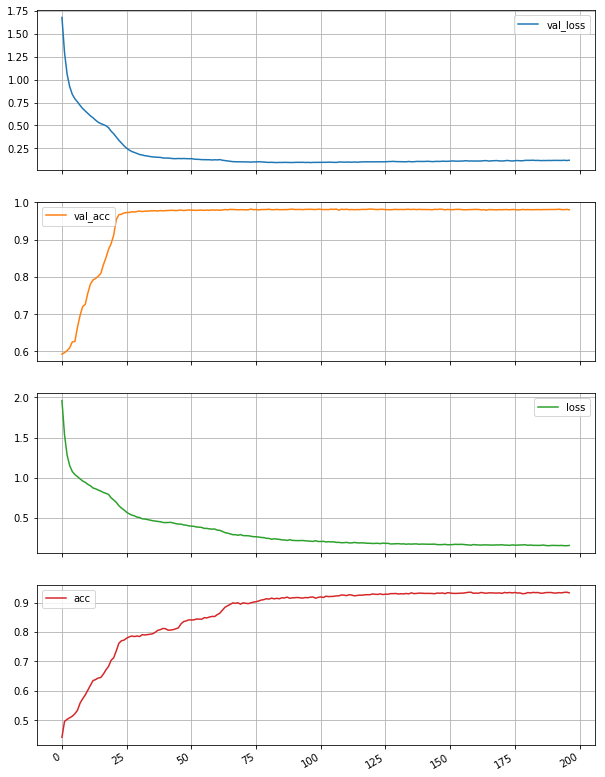

In [381]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [382]:
testtarget1 = to_categorical(testtarget,10)

In [383]:
testing = model.predict(testdata)
testing = np.argmax(testing, axis=1)

In [384]:
counter = 0

for i in range (0,len(testing)):
    if(testing[i] == testtarget[i]):
        counter += 1
acc_nn = (counter/len(testing))*100

In [385]:
print("Testing Accuracy ----->  "+ str(np.around(acc_nn,4)))

Testing Accuracy ----->  97.92


In [386]:
from sklearn.metrics import confusion_matrix
y_true = testtarget
y_pred = testing
confusion_matrix(y_true, y_pred)

array([[ 968,    1,    0,    0,    0,    0,    7,    0,    3,    1],
       [   0, 1124,    2,    1,    0,    0,    1,    0,    7,    0],
       [   1,    0, 1007,    2,    3,    0,    2,    9,    8,    0],
       [   0,    0,    3,  988,    0,    8,    0,    2,    7,    2],
       [   0,    0,    0,    0,  960,    0,    7,    1,    1,   13],
       [   3,    0,    0,   10,    0,  865,    5,    0,    7,    2],
       [   4,    2,    0,    0,    6,    2,  942,    0,    2,    0],
       [   0,    1,   10,    1,    0,    0,    0, 1008,    4,    4],
       [   0,    1,    2,    5,    6,    3,    1,    1,  952,    3],
       [   2,    3,    0,    6,   11,    3,    1,    3,    2,  978]],
      dtype=int64)

In [387]:
print(classification_report(testtarget, testing)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.97      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [388]:
mnist2 = np.asarray(y_pred) #-------------------------------> MNIST prediction 2

In [389]:
USPSMat = np.asarray(USPSMat)
testing = model.predict(USPSMat)
testing1 = np.argmax(testing, axis=1)

In [390]:
counter = 0

for i in range (0,len(testing)):
    if(testing1[i] == USPSTar[i]):
        counter += 1
acc_nn2 = (counter/len(testing))*100

In [391]:
print("Testing Accuracy ----->  "+ str(np.around(acc_nn2,4)))

Testing Accuracy ----->  45.7323


In [392]:
from sklearn.metrics import confusion_matrix
y_true = USPSTar
y_pred = testing1
confusion_matrix(y_true, y_pred)

array([[ 810,   34,   49,  181,  136,  271,   82,   62,   73,  302],
       [  37,  488,  248,  105,  437,   80,    8,  207,  285,  105],
       [  69,   31, 1434,   79,   11,   87,   52,   41,  186,    9],
       [  17,   11,   48, 1588,    5,  175,    1,   16,  129,   10],
       [  34,  190,   23,   44, 1157,   65,   31,  115,  273,   68],
       [ 162,   24,   54,  394,    4, 1139,   38,   28,  141,   16],
       [ 336,   15,  325,   43,   36,  147,  943,   50,   81,   24],
       [  34,  128,  170,  641,   61,   27,    6,  589,  272,   72],
       [ 135,   32,   49,  536,   57,  344,   72,   44,  672,   59],
       [  14,  130,   72,  388,  146,   29,    5,  500,  390,  326]],
      dtype=int64)

In [393]:
print(classification_report(USPSTar, testing1)) 

              precision    recall  f1-score   support

           0       0.49      0.41      0.44      2000
           1       0.45      0.24      0.32      2000
           2       0.58      0.72      0.64      1999
           3       0.40      0.79      0.53      2000
           4       0.56      0.58      0.57      2000
           5       0.48      0.57      0.52      2000
           6       0.76      0.47      0.58      2000
           7       0.36      0.29      0.32      2000
           8       0.27      0.34      0.30      2000
           9       0.33      0.16      0.22      2000

   micro avg       0.46      0.46      0.46     19999
   macro avg       0.47      0.46      0.44     19999
weighted avg       0.47      0.46      0.44     19999



In [394]:
usps2 = testing1 #-------------------------------> USPS prediction 2

# 3 Support Vector Machine

In [12]:
from sklearn.svm import SVC  

In [13]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(trainingdata, trainingtarget)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [223]:
pred_target1 = svclassifier.predict(testdata)

In [268]:
counter = 0

for i in range (0,len(testtarget)):
    if(pred_target1[i] == testtarget[i]):
        counter += 1
acc_svm = (counter/len(testtarget))*100

In [269]:
print("Testing Accuracy ----->  "+ str(np.around(acc_svm,4)))

Testing Accuracy ----->  93.9


In [350]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(testtarget, pred_target1))  

[[ 959    0    5    2    2    4    7    0    1    0]
 [   0 1121    3    3    0    1    2    1    4    0]
 [   6    8  968    9    3    2   11   10   13    2]
 [   5    2   17  944    4   13    1    8   13    3]
 [   2    1   10    1  943    0    4    2    2   17]
 [  13    4    2   39    5  792    9    1   22    5]
 [  10    3   11    1    5   14  911    2    1    0]
 [   1    8   20   10    6    1    0  961    3   18]
 [   8    4    9   25   11   27    6    5  871    8]
 [   7    6    2   13   32    4    0   18    7  920]]


In [351]:
print(classification_report(testtarget, pred_target1)) 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.90      0.93      0.92      1010
           4       0.93      0.96      0.95       982
           5       0.92      0.89      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.89      0.91       974
           9       0.95      0.91      0.93      1009

   micro avg       0.94      0.94      0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [228]:
mnist3 = np.asarray(pred_target1) #-------------------------------> MNIST prediction 3

In [123]:
pred_target = svclassifier.predict(USPSMat)

In [344]:
counter = 0

for i in range (0,len(USPSTar)):
    if(pred_target[i] == USPSTar[i]):
        counter += 1
acc_svm1 = (counter/len(USPSTar))*100

In [345]:
print("Testing Accuracy ----->  "+ str(np.around(acc_svm1,4)))

Testing Accuracy ----->  29.1265


In [352]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(USPSTar, pred_target))  

[[ 348    0  476  152  222  345   74  172   10  201]
 [  60  303  534  275  230  172   17  351   37   21]
 [ 139   63 1293  115   33  221   55   45   21   14]
 [  56   58  341  898    8  520    9   45   48   17]
 [  24   24  221   82  800  215   10  464   82   78]
 [  47   25  652  240   41  876   30   35   41   13]
 [ 146   19  903   55   86  264  462   38    2   25]
 [  19   74  201  706   54  294   12  522   84   34]
 [ 100   16  298  449  126  692   82   58  160   19]
 [  18   38  204  588  142  104    8  580  155  163]]


In [353]:
print(classification_report(USPSTar, pred_target))

              precision    recall  f1-score   support

           0       0.36      0.17      0.24      2000
           1       0.49      0.15      0.23      2000
           2       0.25      0.65      0.36      1999
           3       0.25      0.45      0.32      2000
           4       0.46      0.40      0.43      2000
           5       0.24      0.44      0.31      2000
           6       0.61      0.23      0.33      2000
           7       0.23      0.26      0.24      2000
           8       0.25      0.08      0.12      2000
           9       0.28      0.08      0.13      2000

   micro avg       0.29      0.29      0.29     19999
   macro avg       0.34      0.29      0.27     19999
weighted avg       0.34      0.29      0.27     19999



In [195]:
usps3 = np.asarray(pred_target) #-------------------------------> USPS prediction 3

# 4 Random Forest

In [332]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(trainingdata, trainingtarget)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [336]:
predicted = rfc.predict(testdata)
predicted_m = np.argmax(predicted, axis =1)

In [337]:
count = 0
for i in range (len(testtarget)):
    if(predicted_m[i] == testtarget[i]):
        count += 1
acc_rfc = ((count/len(testtarget))*100)

In [338]:
print("Testing Accuracy ----->  "+ str(np.around(acc_rfc,4)))

Testing Accuracy ----->  90.3


In [339]:
from sklearn.metrics import confusion_matrix
y_true = testtarget
y_pred = predicted_m
confusion_matrix(y_true, y_pred)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [  24, 1109,    0,    1,    0,    0,    1,    0,    0,    0],
       [ 102,    0,  923,    0,    0,    0,    2,    4,    1,    0],
       [ 130,    0,    1,  874,    0,    2,    0,    3,    0,    0],
       [ 107,    0,    0,    0,  869,    0,    0,    0,    1,    5],
       [ 132,    0,    0,    1,    0,  758,    1,    0,    0,    0],
       [  64,    2,    0,    0,    1,    0,  891,    0,    0,    0],
       [  90,    0,    8,    0,    0,    0,    0,  929,    0,    1],
       [ 160,    0,    0,    0,    1,    0,    0,    0,  811,    2],
       [ 118,    0,    0,    0,    3,    0,    0,    1,    0,  887]],
      dtype=int64)

In [395]:
print(classification_report(testtarget, predicted_m))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.89      0.94      1032
           3       1.00      0.87      0.93      1010
           4       0.99      0.88      0.94       982
           5       1.00      0.85      0.92       892
           6       1.00      0.93      0.96       958
           7       0.99      0.90      0.95      1028
           8       1.00      0.83      0.91       974
           9       0.99      0.88      0.93      1009

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.95      0.90      0.91     10000
weighted avg       0.95      0.90      0.91     10000



In [340]:
mnist4 = np.asarray(predicted_m) #-------------------------------> MNIST prediction 4

In [400]:
predicted_u = rfc.predict(USPSMat)
predicted_u = np.argmax(predicted_u, axis =1)
print(len(predicted_u))
print(len(USPSTar))

19999
19999


In [404]:
count = 0
for i in range (len(USPSTar)):
    if(predicted_u[i] == USPSTar[i]):
        count += 1
acc_rfc_usps = ((count/len(USPSTar))*100)

In [409]:
print("Testing Accuracy ----->  "+ str(np.around(acc_rfc_usps,4)))

Testing Accuracy ----->  14.9707


In [410]:
from sklearn.metrics import confusion_matrix
y_true = USPSTar
y_pred = predicted_u
confusion_matrix(y_true, y_pred)

array([[1987,    0,    3,    0,    6,    0,    0,    0,    0,    4],
       [1499,  220,    0,    0,    0,    0,    1,  280,    0,    0],
       [1899,    0,   85,    0,    0,    0,    0,   15,    0,    0],
       [1876,    0,    0,  124,    0,    0,    0,    0,    0,    0],
       [1727,    5,    0,    0,  205,    0,    0,   63,    0,    0],
       [1876,    0,    0,    0,    0,  123,    0,    1,    0,    0],
       [1960,    1,    0,    0,    0,    0,   39,    0,    0,    0],
       [1757,   34,    2,    0,    0,    0,    0,  207,    0,    0],
       [1995,    0,    0,    0,    0,    2,    0,    0,    3,    0],
       [1952,   11,    0,    0,    0,    0,    0,   36,    0,    1]],
      dtype=int64)

In [412]:
print(classification_report(USPSTar, predicted_u))

              precision    recall  f1-score   support

           0       0.11      0.99      0.19      2000
           1       0.81      0.11      0.19      2000
           2       0.94      0.04      0.08      1999
           3       1.00      0.06      0.12      2000
           4       0.97      0.10      0.19      2000
           5       0.98      0.06      0.12      2000
           6       0.97      0.02      0.04      2000
           7       0.34      0.10      0.16      2000
           8       1.00      0.00      0.00      2000
           9       0.20      0.00      0.00      2000

   micro avg       0.15      0.15      0.15     19999
   macro avg       0.73      0.15      0.11     19999
weighted avg       0.73      0.15      0.11     19999



In [194]:
usps4 = np.asarray(predicted_u) #-------------------------------> USPS prediction 4

## Soft-Voting

In [318]:
print(mnist1.shape, mnist2.shape, mnist3.shape, mnist4.shape, usps1.shape, usps2.shape, usps3.shape, usps4.shape)

r1 = mnist1.shape[0]
r2 =  usps1.shape[0]

print(r1, r2)

(10000, 1) (10000,) (10000,) (10000,) (19999,) (19999,) (19999,) (19999,)
10000 19999


In [319]:
class_matrix = np.ones(10)

final_pred_target_mnist = np.zeros((r1,1))

for i in range(1, len(mnist1)):
    i1 = mnist1[i]
    i2 = mnist2[i]
    i3 = mnist3[i]
    i4 = mnist4[i]
    class_matrix[i1] += 1
    class_matrix[i2] += 1
    class_matrix[i3] += 1
    class_matrix[i4] += 1
    y = np.argmax(class_matrix)
    final_pred_target_mnist[i] = y
    class_matrix = np.ones(10)

counter = 0

for i in range (0,len(testtarget)):
    if(final_pred_target_mnist[i] == testtarget[i]):
        counter += 1
final_acc_mnist = (counter/len(testtarget))*100

In [329]:
class_matrix_usps = np.ones(10)

final_pred_target_usps = np.zeros((r2,1))

for i in range(1, len(USPSTar)):
    i1 = usps1[i]
    i2 = usps2[i]
    i3 = usps3[i]
    i4 = usps4[i]
    class_matrix[i1] += 1
    class_matrix[i2] += 1
    class_matrix[i3] += 1
    class_matrix[i4] += 1
    y = np.argmax(class_matrix)
    final_pred_target_usps[i] = y
    class_matrix = np.ones(10)

counter = 0

for i in range (0,len(USPSTar)):
    if(final_pred_target_usps[i] == USPSTar[i]):
        counter += 1
final_acc_usps = (counter/len(USPSTar))*100

In [331]:
print("Merged Accuracy on MNIST after Soft-Voting ----->  "+ str(np.around(final_acc_mnist,4)))
print("Merged Accuracy on MNIST after Soft-Voting ----->  "+ str(np.around(final_acc_usps,4)))

Merged Accuracy on MNIST after Soft-Voting ----->  90.47
Merged Accuracy on MNIST after Soft-Voting ----->  37.8119
